# GST ANALYTICS HACKTHON 2024
-------------------------------------------------------------------------------

# DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading the training data
X_train = pd.read_csv('Train_60/X_Train_Data_Input.csv')
Y_train= pd.read_csv('Train_60/Y_Train_Data_Target.csv')

# Loading the test data

X_test = pd.read_csv('Test_20/X_Test_Data_Input.csv')
Y_test = pd.read_csv('Test_20/Y_Test_Data_Target.csv')

# DATA EXPLORATION

## Combining the X and Y and dropping the ID column

In [2]:
train_data =pd.merge(X_train, Y_train, on='ID')
test_data = pd.merge(X_test, Y_test, on='ID')
train_data = train_data.drop(columns=['ID'], axis = 1)
test_data = test_data.drop(columns=['ID'], axis = 1)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [4]:
train_data.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values

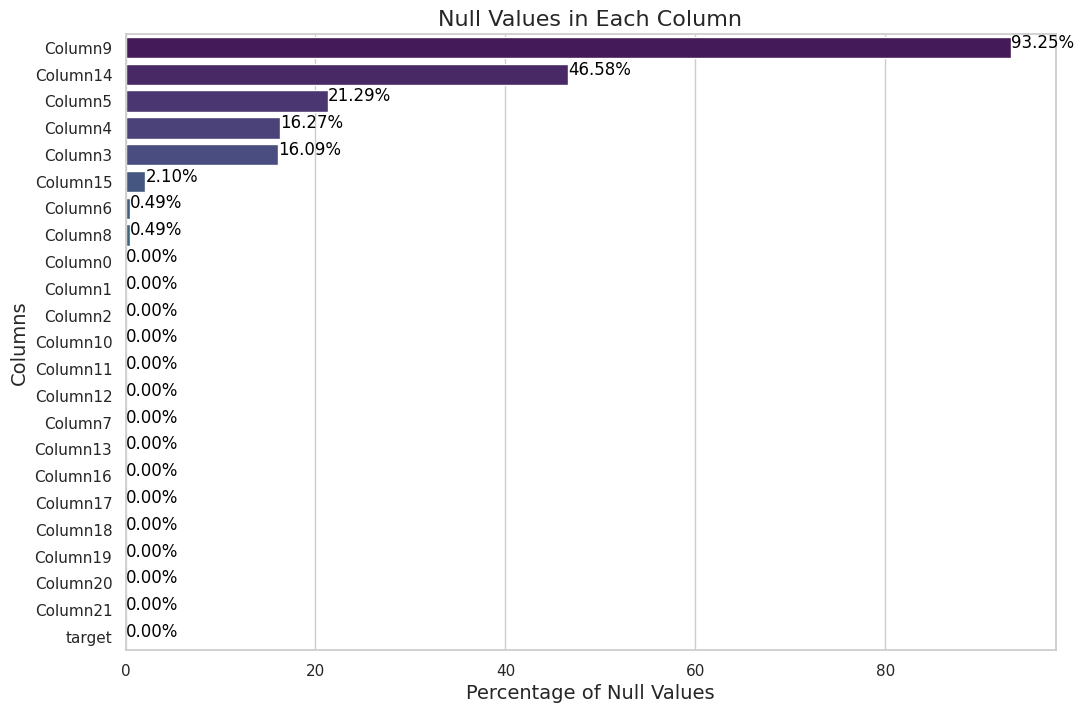

In [5]:
# Calculating the percentage of null values
null_percentage = (train_data.isnull().sum() / len(train_data)) * 100
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

# Sorting the DataFrame for better visualization
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(null_percentage_df))
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Null Percentage', 
    y='Column', 
    data=null_percentage_df, 
    palette=palette
)

for index, value in enumerate(null_percentage_df['Null Percentage']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left")

# Add titles and labels
plt.title('Null Values in Each Column', fontsize=16)
plt.xlabel('Percentage of Null Values', fontsize=14)
plt.ylabel('Columns', fontsize=14)

# Show the plot
plt.show()

## Correlations of target with other columns

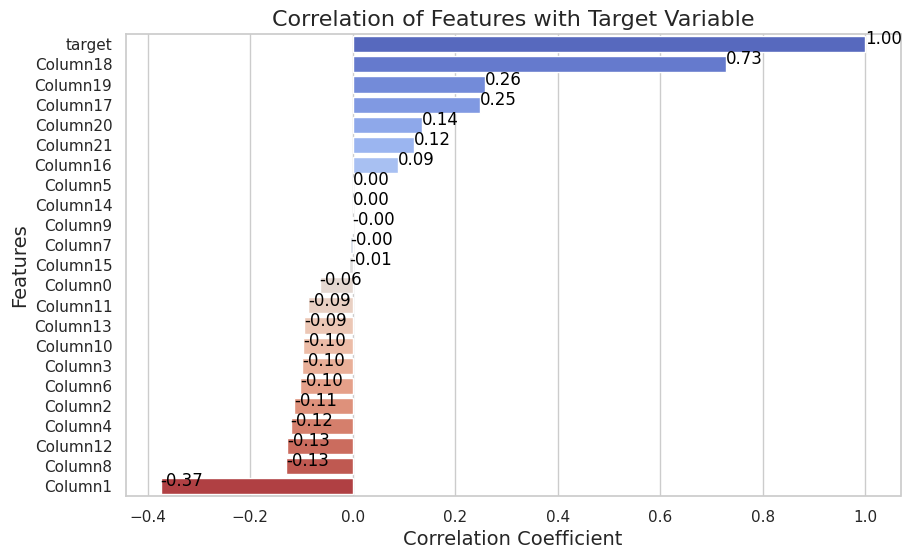

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlations
correlations = train_data.corrwith(train_data['target'])
correlations_df = correlations.reset_index()
correlations_df.columns = ['Feature', 'Correlation']

# Sorting the correlations for better visualization
correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(correlations_df))

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Correlation', 
    y='Feature', 
    data=correlations_df, 
    palette=palette
)

for index, value in enumerate(correlations_df['Correlation']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.title('Correlation of Features with Target Variable', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()


## Columns with categorical data

In [7]:
# Finding how many unique value each columns have 
unique_values = train_data.nunique()
print(unique_values)


Column0         19
Column1       2564
Column2       9424
Column3         47
Column4         47
Column5     148334
Column6     157264
Column7     166513
Column8     355728
Column9      49650
Column10         2
Column11         2
Column12         2
Column13         2
Column14     42362
Column15     66302
Column16         3
Column17       153
Column18        11
Column19         2
Column20         2
Column21         2
target           2
dtype: int64


In [8]:
# Based on the above unique value we are assumming that columns with less than 10k unique value as catgorical(Since no info is present about the columns) 
categorical_columns = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column10', 
                       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 
                       'Column19', 'Column20', 'Column21']
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

## DATA IMPUTATION

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [10]:
X_train = train_data.drop(columns=['target'], axis = 1)
Y_train = train_data['target']
X_test = test_data.drop(columns=['target'], axis = 1)
Y_test = test_data['target']


In [11]:
cat_imputer = SimpleImputer(strategy='most_frequent')  # for filling the missing value with most frequent category for the catgorical column
num_imputer = SimpleImputer(strategy='median')          # for filling the missing value with median(roboust to outliers) for the numerical column
scaler = RobustScaler()   # for Scaling the numerical columns 
categorical_columns = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column10', 
                       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 
                       'Column19', 'Column20', 'Column21']
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_columns]), columns=categorical_columns)
X_train_num = pd.DataFrame(scaler.fit_transform(num_imputer.fit_transform(X_train[numerical_columns])), columns=numerical_columns)
X_train_preprocessed = pd.concat([X_train_cat, X_train_num], axis=1)

X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[categorical_columns]), columns=categorical_columns)
X_test_num = pd.DataFrame(scaler.transform(num_imputer.transform(X_test[numerical_columns])), columns=numerical_columns)
X_test_preprocessed = pd.concat([X_test_cat, X_test_num], axis=1)


In [12]:
X_train_preprocessed

,Column0,Column1,Column2,Column3,Column4,Column10,Column11,Column12,Column13,Column16,...,Column19,Column20,Column21,Column5,Column6,Column7,Column8,Column9,Column14,Column15
0,2.0,2495.0,3726.0,0.678139,0.701403,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.999191,21.994371,18.318194,0.346442,0.0,-4.242636e-10,0.0
1,0.0,2495.0,3454.0,0.452580,0.701403,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.036013,51.267163,132.565476,0.148729,0.0,-4.311622e-10,0.0
2,2.0,2495.0,4543.0,-1.577453,-1.429540,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.641870,0.0,-1.734997e-08,0.0
3,0.0,211.0,59.0,0.678139,0.701403,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.641870,0.0,0.000000e+00,0.0
4,0.0,718.0,950.0,-2.028572,-1.855728,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.641870,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304.0,1126.0,0.678139,0.701403,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.641870,0.0,0.000000e+00,0.0
785129,0.0,2495.0,2265.0,0.678139,0.701403,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.047393,0.000000,0.000000,0.277269,0.0,-3.449298e-10,0.0
785130,0.0,2495.0,3760.0,0.678139,0.701403,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.069325,0.0,0.000000e+00,0.0
785131,0.0,2480.0,4493.0,0.001462,0.062121,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.328759,0.000000,0.000000,0.198905,0.0,0.000000e+00,0.0


# MODEL TRAINING

### Training base models 100k datapoints(for faster infrence) and comparing the results 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Select only the first 100,000 rows
X_train_subset = X_train_preprocessed[:100000]
Y_train_subset = Y_train[:100000]

# Split the subset into training and testing sets
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_train_subset, Y_train_subset, test_size=0.2, random_state=42, stratify=Y_train_subset)

results = {}

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_, Y_train_)
y_pred_log_reg = log_reg.predict(X_test_)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_log_reg),
    'Report': classification_report(Y_test_, y_pred_log_reg)
}

# 2. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_, Y_train_)
y_pred_svm = svm.predict(X_test_)
results['SVM'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_svm),
    'Report': classification_report(Y_test_, y_pred_svm)
}

# 3. Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_, Y_train_)
y_pred_rf = random_forest.predict(X_test_)
results['Random Forest'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_rf),
    'Report': classification_report(Y_test_, y_pred_rf)
}

# 4. XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train_, Y_train_)
y_pred_xgb = xgboost.predict(X_test_)
results['XGBoost'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_xgb),
    'Report': classification_report(Y_test_, y_pred_xgb)
}

# 5. CatBoost
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train_, Y_train_)
y_pred_cat = catboost.predict(X_test_)
results['CatBoost'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_cat),
    'Report': classification_report(Y_test_, y_pred_cat)
}

# 6. LightGBM
lightgbm = LGBMClassifier()
lightgbm.fit(X_train_, Y_train_)
y_pred_lgbm = lightgbm.predict(X_test_)
results['LightGBM'] = {
    'Accuracy': accuracy_score(Y_test_, y_pred_lgbm),
    'Report': classification_report(Y_test_, y_pred_lgbm)
} 


[LightGBM] [Info] Number of positive: 7569, number of negative: 72431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2503
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094613 -> initscore=-2.258573
[LightGBM] [Info] Start training from score -2.258573


In [14]:
def print_results(results):
    table = []
    for model, metrics in results.items():
        table.append([model, metrics['Accuracy']])
    print(tabulate(table, headers=['Model', 'Accuracy'], tablefmt='fancy_grid', floatfmt=".4f"))
    
    # Print classification reports
    for model, metrics in results.items():
        print(f"\nClassification Report for {model}:\n")
        print(metrics['Report'])

print_results(results)


╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │     0.9145 │
├─────────────────────┼────────────┤
│ SVM                 │     0.9054 │
├─────────────────────┼────────────┤
│ Random Forest       │     0.9746 │
├─────────────────────┼────────────┤
│ XGBoost             │     0.9765 │
├─────────────────────┼────────────┤
│ CatBoost            │     0.9771 │
├─────────────────────┼────────────┤
│ LightGBM            │     0.9767 │
╘═════════════════════╧════════════╛

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18108
           1       0.91      0.11      0.19      1892

    accuracy                           0.91     20000
   macro avg       0.91      0.55      0.57     20000
weighted avg       0.91      0.91      0.88     20000


Classification Report for SVM:

              precision    recall  f

- **Observation**:  XGBoost  CatBoost LightGBM  are performing better so will continue with these models 


### Model Ensemble Approach for Improved Performance

### Initial Hyperparameter Tuning

We initially tuned the hyperparameters for each individual model using Optuna. The results on the test data were as follow

| Model    | F1 Score |
|----------|----------|
| XGBoost  | 0.88     |
| LightGBM | 0.88    catboost||    88    |    0.89#     |

## Ensemble Attempts

### 1. Stacking with Logistic Regression

Our first attempt at combining the models was through stacking:

- Meta-model: Logistic Regression
- Result: No improvement in F1 score

### 2. Voting Classifier

We then tried a Voting Classifier ensemble:

- Result: Better pe###ormance than stacking

## Final Approach

Our best-performing approach involved the following steps:

1. Tune each model individually using Optuna
2. Ensemble the tuned models using a Voting Classifier

This method yielded the best results, improving upon the individual model performances.the individual model performances.

In [15]:
### Need not to run the below cell as its time consuming without the gpu we have found the best hyperparameter for this data and printed it below

```
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)

# Assume X_train_preprocessed and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_train_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

def objective(trial):
    # XGBoost parameters
    xgb_params = {
        "n_estimators": trial.suggest_int("xgb_n_estimators", 500, 1200),
        "learning_rate": trial.suggest_float("xgb_learning_rate", 1e-3, 1e-1, log=True),
        "max_depth": trial.suggest_int("xgb_max_depth", 5, 10),
        "min_child_weight": trial.suggest_int("xgb_min_child_weight", 1, 10),
        "subsample": trial.suggest_float("xgb_subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("xgb_gamma", 0, 5),
        "device" : "cuda"
    }
    
    # CatBoost parameters
    catboost_params = {
        "iterations": trial.suggest_int("cat_iterations", 500, 1200),
        "learning_rate": trial.suggest_float("cat_learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("cat_depth", 6, 10),
        "l2_leaf_reg": trial.suggest_float("cat_l2_leaf_reg", 1e-8, 100, log=True),
        "bootstrap_type": "Bayesian",
        "task_type": "CPU",  # Changed to CPU for compatibility
        "bagging_temperature": trial.suggest_float("cat_bagging_temperature", 0, 10),
        "random_strength": trial.suggest_float("cat_random_strength", 1e-8, 10, log=True),
    }
    
    # LightGBM parameters
    lgb_params = {
        "n_estimators": trial.suggest_int("lgb_n_estimators", 500, 1200),
        "learning_rate": trial.suggest_float("lgb_learning_rate", 1e-3, 1e-1, log=True),
        "num_leaves": trial.suggest_int("lgb_num_leaves", 20, 3000),
        "max_depth": trial.suggest_int("lgb_max_depth", 3, 12),
        "subsample": trial.suggest_float("lgb_subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("lgb_colsample_bytree", 0.5, 1.0)
    }
    
    try:
        # Create and train models
        xgb_model = xgb.XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
        cat_model = CatBoostClassifier(**catboost_params, verbose=False)
        lgb_model = lgb.LGBMClassifier(**lgb_params)
        
        # Ensemble model
        ensemble = VotingClassifier([
            ('xgb', xgb_model),
            ('cat', cat_model),
            ('lgb', lgb_model)
        ], voting='soft')
        
        # Cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(ensemble, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
        
        return np.mean(scores)
    except Exception as e:
        logging.error(f"Error in objective function: {str(e)}")
        return float('-inf')  # Return worst possible score on error

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, timeout=36000)  # 200 trials or 10 hour
```

In [16]:
## Best parameters
best_params = {'xgb_n_estimators': 762, 'xgb_learning_rate': 0.06750561675312018, 'xgb_max_depth': 9, 'xgb_min_child_weight': 6, 'xgb_subsample': 0.6271839566577789, 'xgb_colsample_bytree': 0.7746518755079177, 'xgb_gamma': 4.109529387719718, 'cat_iterations': 1079, 'cat_learning_rate': 0.030348621362567964, 'cat_depth': 8, 'cat_l2_leaf_reg': 2.54042633051254e-05, 'cat_bagging_temperature': 0.7404633768033837, 'cat_random_strength': 1.9367791836957116e-06, 'lgb_n_estimators': 500, 'lgb_learning_rate': 0.015263583672650079, 'lgb_num_leaves': 417, 'lgb_max_depth': 8, 'lgb_subsample': 0.9977381407918132, 'lgb_colsample_bytree': 0.8023937905666044} 
print("Best parameters:", best_params )

Best parameters: {'xgb_n_estimators': 762, 'xgb_learning_rate': 0.06750561675312018, 'xgb_max_depth': 9, 'xgb_min_child_weight': 6, 'xgb_subsample': 0.6271839566577789, 'xgb_colsample_bytree': 0.7746518755079177, 'xgb_gamma': 4.109529387719718, 'cat_iterations': 1079, 'cat_learning_rate': 0.030348621362567964, 'cat_depth': 8, 'cat_l2_leaf_reg': 2.54042633051254e-05, 'cat_bagging_temperature': 0.7404633768033837, 'cat_random_strength': 1.9367791836957116e-06, 'lgb_n_estimators': 500, 'lgb_learning_rate': 0.015263583672650079, 'lgb_num_leaves': 417, 'lgb_max_depth': 8, 'lgb_subsample': 0.9977381407918132, 'lgb_colsample_bytree': 0.8023937905666044}


`{'xgb_n_estimators': 762, 'xgb_learning_rate': 0.06750561675312018, 'xgb_max_depth': 9, 'xgb_min_child_weight': 6, 'xgb_subsample': 0.6271839566577789, 'xgb_colsample_bytree': 0.7746518755079177, 'xgb_gamma': 4.109529387719718, 'cat_iterations': 1079, 'cat_learning_rate': 0.030348621362567964, 'cat_depth': 8, 'cat_l2_leaf_reg': 2.54042633051254e-05, 'cat_bagging_temperature': 0.7404633768033837, 'cat_random_strength': 1.9367791836957116e-06, 'lgb_n_estimators': 500, 'lgb_learning_rate': 0.015263583672650079, 'lgb_num_leaves': 417, 'lgb_max_depth': 8, 'lgb_subsample': 0.9977381407918132, 'lgb_colsample_bytree': 0.8023937905666044}`

# MODEL TESTING ON TEST DATA

In [23]:
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Creating models with best parameters
xgb_best = xgb.XGBClassifier(
    n_estimators=best_params['xgb_n_estimators'],
    learning_rate=best_params['xgb_learning_rate'],
    max_depth=best_params['xgb_max_depth'],
    min_child_weight=best_params['xgb_min_child_weight'],
    subsample=best_params['xgb_subsample'],
    colsample_bytree=best_params['xgb_colsample_bytree'],
    gamma=best_params['xgb_gamma'],
    random_state= 0,
    #device='cuda'
)

cat_best = CatBoostClassifier(
    iterations=best_params['cat_iterations'],
    learning_rate=best_params['cat_learning_rate'],
    depth=best_params['cat_depth'],
    l2_leaf_reg=best_params['cat_l2_leaf_reg'],
    bagging_temperature=best_params['cat_bagging_temperature'],
    random_strength=best_params['cat_random_strength'],
    random_state= 0,
    silent=True 
    #task_type="GPU"
)

lgb_best = lgb.LGBMClassifier(
    n_estimators=best_params['lgb_n_estimators'],
    learning_rate=best_params['lgb_learning_rate'],
    num_leaves=best_params['lgb_num_leaves'],
    max_depth=best_params['lgb_max_depth'],
    subsample=best_params['lgb_subsample'],
    colsample_bytree=best_params['lgb_colsample_bytree'],
    random_state= 0,
    #device="gpu"
)

# Create and train the ensemble
final_ensemble = VotingClassifier([
    ('xgb', xgb_best),
    ('cat', cat_best),
    ('lgb', lgb_best)
], voting='soft')

# Fitting the ensemble on the training data
final_ensemble.fit(X_train_preprocessed, Y_train)


[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7746518755079177,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=4.109529387719718,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_c...
                                            multi_strategy=None,
                                            n_estimators=762, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7af4f274f590>),
                             ('lgb',
                              LGBMClassifier(colsample_bytree=0.8023937905666044,
                                             learning_rate=0.015263583672650079,
                                             max_depth=8, n_estimators=500,
                                             num_leaves=417, random_state=0,
                                             subsample=0.9977381407918132))],
                 voting='soft')


=== Overall Metrics ===
Accuracy: 0.9785
Balanced Accuracy: 0.9621
Precision (Binary): 0.8470
Recall (Binary): 0.9420
F1 Score (Binary): 0.8920
Precision (Weighted): 0.9800
Recall (Weighted): 0.9785
F1 Score (Weighted): 0.9790
AUC-ROC Score: 0.9949

=== Confusion Matrix ===
[[232835   4199]
 [  1432  23246]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



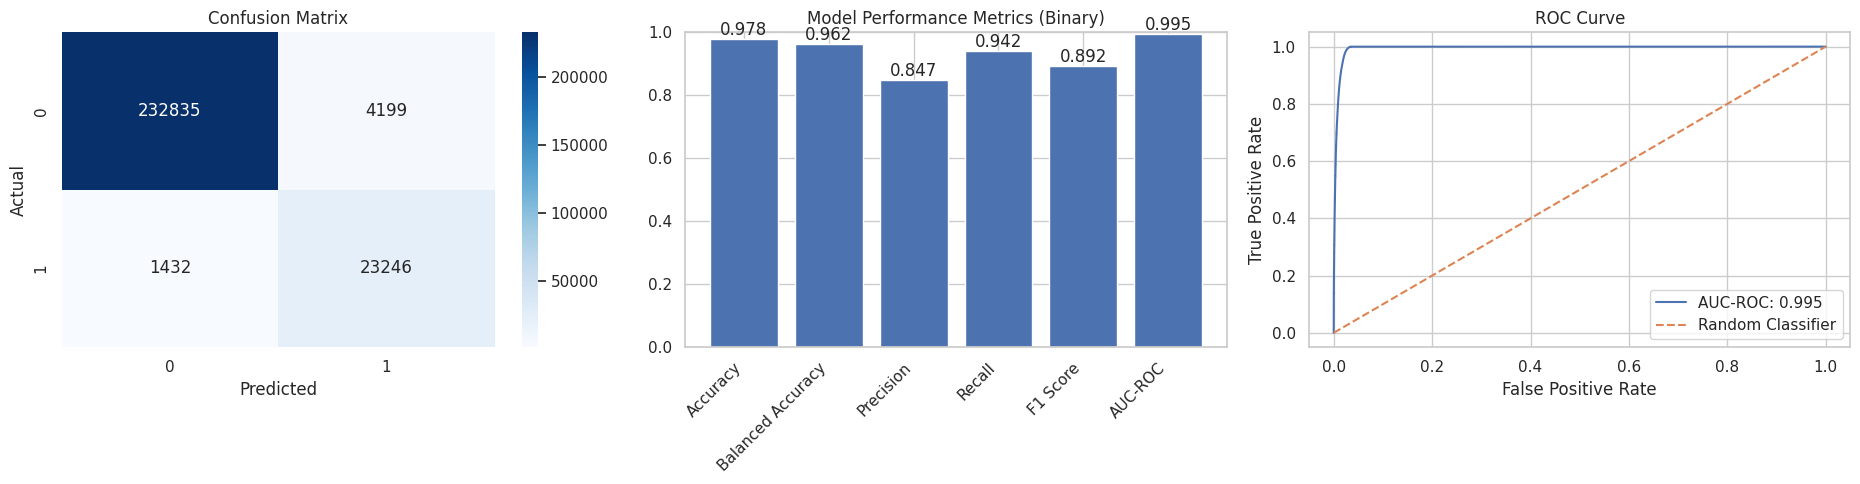

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = final_ensemble.predict(X_test_preprocessed)
y_pred_proba = final_ensemble.predict_proba(X_test_preprocessed)[:, 1]

# Calculating metrics
accuracy = accuracy_score(Y_test, y_pred)
balanced_acc = balanced_accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='binary')
recall = recall_score(Y_test, y_pred, average='binary')
f1 = f1_score(Y_test, y_pred, average='binary')
precision_weighted = precision_score(Y_test, y_pred, average='weighted')
recall_weighted = recall_score(Y_test, y_pred, average='weighted')
f1_weighted = f1_score(Y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test, y_pred_proba)

# Metrics
print("\n=== Overall Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision (Binary): {precision:.4f}")
print(f"Recall (Binary): {recall:.4f}")
print(f"F1 Score (Binary): {f1:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Confusion matrix
print("\n=== Confusion Matrix ===")
print(conf_matrix)

# Classification report
print("\n=== Classification Report ===")
print(class_report)

# Plotting
plt.figure(figsize=(25, 5))

# Plot confusion matrix
plt.subplot(141)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot bar chart of metrics
plt.subplot(142)
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
values = [accuracy, balanced_acc, precision, recall, f1, auc_roc]
plt.bar(metrics, values)
plt.title('Model Performance Metrics (Binary)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Plot ROC curve
plt.subplot(143)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC-ROC: {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()
